###### SCIE1000/1100 Practical 6 - Semester 2, 2025 #

##### This practical focusses on the following material: 
- Science and modelling content from Lectures in weeks 1-5.
- Python from Appendix A.8 _Writing functions_.

Please review any course material you may have missed prior to class.

## Practical participation ##

A reminder that practicals are assessed on active participation. To earn the participation mark, you will need to:

1. Arriving on-time and staying on task throughout the practical.
2. Writing solutions to the problems you are working so that the demonstrators can note your progress.
3. Participating in peer-to-peer discussions when asked.
4. Explaining your working on problems to demonstrate your understanding.
5. Any other relevant task as directed by the demonstrators (for example, the philosophy practical may have different participation requirements than the other practicals).

Your demonstrators are there to guide you through the activities, and will come around to all groups throughout the sessions to discuss progress with the activities and offer assistance where it is needed. Remember to treat our demonstrators with respect and engage with them in conversation.


**This practical contributes toward your final grade.  Practical grading is explained in the Practical exercises folder on Blackboard**

**Goals**:  In this practical you will work through some questions that utilise various functions from SCIE1000 to model scientific scenarios.  As usual, the broad concepts and techniques are more
important than the specific examples. Do not try to commit lots of facts to
memory; instead, know **how** to do things, and **when** certain models
and approaches are appropriate.

The aim of the computing component of this practical is to review the topics covered in weeks 1-5, to give you more opportunities to practice using Python. Support for these Python concepts is available: see Appendix A of the course notes, ask on the course discussion board, make use of lecturer office hours, or attend the Python Class.

_Many people find learning to program a daunting prospect when they first encounter it; persistence is key! And remember, ask your demonstrator if have any questions during the practical._

## Part 1: Modelling with functions (50 minutes)

#### Task 1.1 Kleiber's Law ####

Kleiber’s Law states that an organism’s basal metabolic rate (BMR) scales with its body mass (M) to the ¾ power:

$$BMR∝M^{3/4}$$

This relationship has been observed across a vast range of species - from unicellular organisms to elephants - and is foundational in comparative physiology and ecology. Just like in animals, plant metabolic rate (e.g., respiration or photosynthesis) scales with plant size (e.g., mass) according to a power law:

$$MR∝ M^𝛼$$

Where:

$MR$ = metabolic rate
$M$ = plant size

$𝛼 ≈ ¾$ is often assumed. Studies show that this relationship can be more complex. For example, Niklas et al. (2015) present the following graph of log respiration rate vs log DNA concentration for sunflower seedlings, grown in light (white dots) and darkness (black dots):

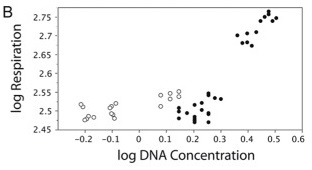

1. Use this plot to develop power models under the two different growing conditions.
2. How do these models compare to Kleiber's Law?

Niklas, K. J., & Kutschera, U. (2015). Kleiber's Law: How the Fire of Life ignited debate, fueled theory, and neglected plants as model organisms. _Plant signaling & behavior_, **10(7)**.


In [13]:
from math import log, log as ln, e, pi

x_1, y_1 = 0.2, 2.475
x_2, y_2 = 0.48, 2.775
m_d = (y_2 - y_1) / (x_2 - x_1)
c_d = y_1 - m_d * x_1
print(f"Darkness: y = {m_d:.3f}x + {c_d:.3f}")
A_d = e**c_d
B_d = m_d
print(f"Darkness: y = {A_d:.3f}x^{B_d:.3f}")

x_1, y_1 = -0.3, 2.457
x_2, y_2 = 0.1, 2.54
m_l = (y_2 - y_1) / (x_2 - x_1)
c_l = y_1 - m_l * x_1
print(f"Light: y = {m_l:.3f}x + {c_l:.3f}")
A_l = e**c_l
B_l = m_l
print(f"Light: y = {A_l:.3f}x^{B_l:.3f}")

print("The exponents are not close to 0.75")

Darkness: y = 1.071x + 2.261
Darkness: y = 9.590x^1.071
Light: y = 0.208x + 2.519
Light: y = 12.419x^0.208


#### Task 1.2: Bacterial growth ####

(This question was on the final examination in 2010.)

A species of bacterium reproduces by individuals splitting into two. A population of this bacterium has a constant doubling time. At time $t=0$ hours the population is $10^4$ individuals, and at time $t=5$ hours the population is $10^5$ individuals.

1. What type of model should we use for population growth of this bacterium?
2. A bacteria generation refers to each parent bacterium dividing into two cells, a process called binary fission. This means the population will double from one generation to the next. How many generations are there between $t=0$ and $t=5$? (Give your answer correct to one decimal place.)
3. Find the doubling time of this population. _For bacterial growth, this is also known as the generation time._
4. At what time will there be $10^8$ individuals in the population?

In [40]:
from math import log, log as ln, e

A = 10**4
B = 1 / 5 * ln(10)
print(f"{B=}")


def P(t) -> float:
    return A * e ** (B * t)


print(f"{P(0)=} {P(5)=}")

num_generations = log(10, 2)
print(f"{num_generations=:.1f}")

doubling_time = ln(2) / B
# doubling_time = ln(2)/B
print(f"{doubling_time=}")

x = 4 * ln(10) / B
print(f"Time to reach 1e8: {x}")

B=0.4605170185988092
P(0)=10000.0 P(5)=100000.00000000001
num_generations=3.3
doubling_time=1.5051499783199056
Time to reach 1e8: 19.999999999999996


#### Task 1.3: Marine Heat Waves ####

(This question was on the final examination in 2020.)

A marine heat wave (MHW) is defined as an anomalously warm event in the sea surface temperature _lasting five days or more, with temperatures warmer than the 90th percentile based on a 30-year historical baseline period_ (Hobday et al., 2016). Thus, the 90th percentile for the 30-year historical baseline measurements is the _MHW threshold_. Historical data is based on the particular location and the time of the year.  A value from a data set which is above the 90th percentile is one which is greater than 90% of the values in the data set.

Marine heat waves (MHWs) have been studied by many researchers using several different definitions.  Hobday et al. (2016) set out a unifying definition of a marine heat wave.  

Suppose that the following data represents ocean temperatures in a hypothetical coral reef, called Reef X, measured at 12 noon each day in January 2020. 

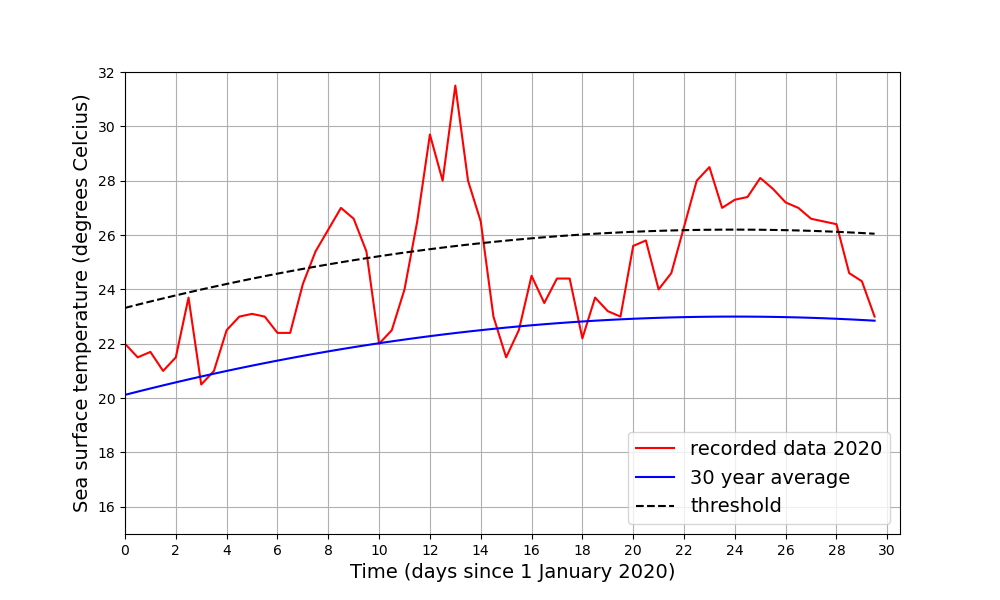

1. Note that in the above figure, $t=0$ days represents January 1st.  According to the figure, what is the 30 year average sea surface temperature for the date of January 9th? 

2. Suppose that you wanted to model the 30-year average sea surface temperature for Reef X over the year using a mathematical function.  What type of function would you use?  Why?

3. Consider the statement _"The sea surface temperature recorded on 15 January 2020 in Reef X was the highest recorded temperature for that day of the calendar year in Reef X in the last 30 years."_  Is this statement plausible?  Why or why not?
 
4. How many marine heat waves occurred in Reef X during January 2020?  How long did each one last for?

5. Describe what a marine heat wave is in a manner that would be well-understood by the general public in Australia.

Hobday et al. (2016) A hierarchical approach to defining marine heatwaves, _Progress in Oceanography._ **141** 227-238.

## Part 2: Writing functions (15 minutes) ##

#### Task 2.1: Python - Functions warm-up ####

Write down all of the output generated by the following Python program and then test your answers by running the code in the cell below.

    
    def f(x): 
        ans = x*5       
        return ans      
                    
    def g(x):           
        ans = x+4       
        return ans      
                   
    a = 7             
    b = g(a)         
    print(f(b))    
    a = g(a-1)     
    print(a)       


In [45]:
# test your code here
# 55

#### Task 2.2: Fahrenheit to Celsius ####

Your task now is to write your own user defined function.
This function will take a temperature quoted in degrees Fahrenheit and convert it to degrees Celsius.
You should call your function multiple times in the main section of the code with different inputs and print each result - try 0$^\circ$F, 100$^\circ$F, 212$^\circ$F, and any other value you think relevant.

In [50]:
# test your code here


def fahrenheit_to_celsius(degrees_f: float) -> float:
    return (32 - degrees_f) * 5 / 9


FtC = fahrenheit_to_celsius

print(f"{FtC(0)=} {FtC(100)=} {FtC(212)=}")

FtC(0)=17.77777777777778 FtC(100)=-37.77777777777778 FtC(212)=-100.0


## Part 3: Problem solving with classmates (45 minutes) ##

For these problems you will need to have discussions with a small group.

####  Task 3.1: Morphine ####

**For this task you will need to write a small Python program.** This is important practice for you before you get started on your Python and communication assignment. 

**Information on morphine:**  Morphine can be administered via injection / IV.  The quantity of morphine in a given dose may vary, but one guideline is to use 0.1 mg of morphine for each kg of the patient's body mass.  The time taken for half the quantity of morphine to be removed from the body is 2 hours.  An exponential function can be used to model the amount of morphine in the body over time:  $A = A_0 e^{kt}$  (note that $k$ will be negative).

1. With your group calculate the value of $k$ for morphine.


2. Define a Python function called MorphineModel, which takes two arguments: dose amount $A_0$ and time since last dose $t$, and returns the amount of morphine in the body at this time $t$.


3. Add to your computer code so that you have a program which is an implementation of the following flowchart. Ensure that your code is well-communicated to a user of the program (via the print statements) and well-communicated to someone reading the code (via comments).  

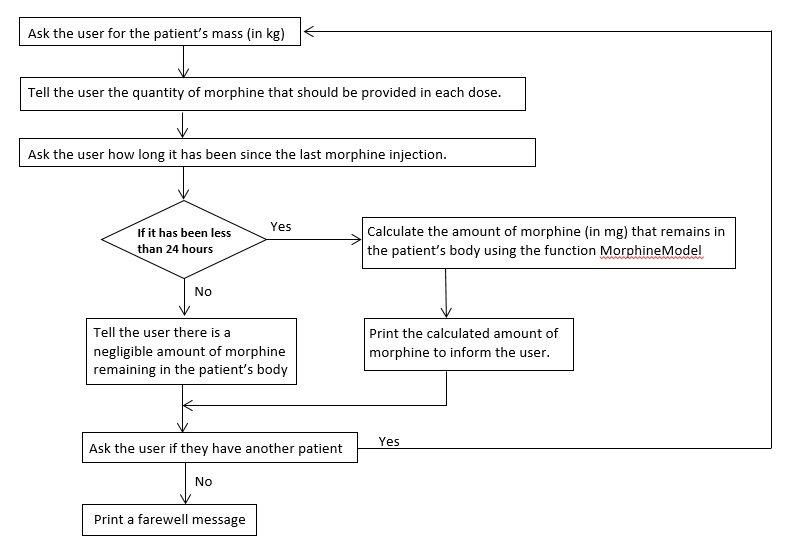

In [ ]:
from math import log as ln, e


def MorphineModel(dose_amount: float, hours_since_last_dose: float) -> float:
    """
    Time since last dose is in units hours,
    result units is same as dose_amount
    """
    A = dose_amount
    B = -ln(2) / 2
    return A * e ** (B * hours_since_last_dose)


def patient():
    body_mass_kg = float(input("What is the mass in Kilograms (kg) of your patient: "))
    dose_amount_milligrams = body_mass_kg * 0.1
    print(f"You should provide {dose_amount_milligrams:.2f}mg of morphine.")

    hours_since_last_dose = float(input("How many hours have passed: "))
    if hours_since_last_dose < 24.0:
        morphine_milligrams_remaining = MorphineModel(
            dose_amount_milligrams, hours_since_last_dose
        )
        print(
            f"There is approximately {morphine_milligrams_remaining:.2f}mg of morphine remaining"
        )
    else:
        print("There is a negligible amount of morphine remaining")
    if input("Do you have another patient? (y/N): ").lower() in ["y", "yes", "1"]:
        patient()


patient()

## Part 4: Further problems ##

These problems are provided for further practice either during or after the practical.

#### Task 4.1 Medicine concentration ####

A patient takes a medicine once a day for 14 days. Each dose increases blood concentration by 5 units. Every day, the body removes 2 units naturally (metabolism). However, on some days, the patient forgets to take their dose. The initial blood concetration is 0.

The medication schedule is stored in an array, where 1 means the patient took the medicine and 0 means they forgot.

Write a Python program that calculates and presents the blood concentration each day.

In [1]:
# Add to this cell to complete the program

import numpy as np
import matplotlib.pyplot as plt

# Patient's medication schedule: 1 = took dose, 0 = missed dose
schedule = np.array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

# Create an array to store the concentrations for each day
concentration = np.zeros(len(schedule))

# Fill in the rest of your program below

for i, remembered in enumerate(schedule):
    current = 0
    if i > 0:
        current = concentration[i - 1]
    if bool(remembered):
        concentration[i] = current + 5 - 2
    else:
        concentration[i] = current - 2
    if concentration[i] > 10:
        print(f"{i} days later, the concentration is effective at {concentration[i]}")
    else:
        print(
            f"{i} days later, the concentration is not effective at {concentration[i]}"
        )

print(f"{concentration=}")

0 days later, the concentration is not effective at 3.0
1 days later, the concentration is not effective at 6.0
2 days later, the concentration is not effective at 4.0
3 days later, the concentration is not effective at 7.0
4 days later, the concentration is not effective at 5.0
5 days later, the concentration is not effective at 8.0
6 days later, the concentration is effective at 11.0
7 days later, the concentration is effective at 14.0
8 days later, the concentration is effective at 17.0
9 days later, the concentration is effective at 15.0
10 days later, the concentration is effective at 13.0
11 days later, the concentration is effective at 16.0
12 days later, the concentration is effective at 19.0
13 days later, the concentration is effective at 22.0
concentration=array([ 3.,  6.,  4.,  7.,  5.,  8., 11., 14., 17., 15., 13., 16., 19.,
       22.])


#### Task 4.2 Minimum effective concentration ####

This medication is only effective if the concentration is above 10 units (this is known as the _minimum effective concentration._ Extend your code to check daily if the concentration is above this threshold, and print out a suitable statement.

In [ ]:
# Write your extended program here